# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

####  Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.chdir("C:/Users/USER/Desktop/Data Science/Pandas Project")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### Use glob to match the pattern "csv"
####  Combine all the files in the generated list above and export to a CSV

In [3]:
def combine_and_export_to_csv(pattern, output_csv):
    # Use glob to find files matching the pattern
    files = glob.glob('*.{}'.format('csv'))

    # Check if any files were found
    if not files:
        print(f"No files found for pattern: {pattern}")
        return

    # Create an empty list to store DataFrames
    dfs = []

    # Read each file into a DataFrame and append to the list
    for file in files:
        df = pd.read_csv(file)
        dfs.append(df)

    # Concatenate all DataFrames in the list
    combined_df = pd.concat(dfs, ignore_index=True)

    # Export the combined DataFrame to a CSV file
    combined_df.to_csv(output_csv, index=False)

    print(f"Combined data exported to {output_csv}")

pattern = 'path/to/files/*.csv'  # Update the pattern to match your file names and location
output_csv = 'combined_data.csv'  # Update the output file name as needed

combine_and_export_to_csv(pattern, output_csv)

Combined data exported to combined_data.csv


#### Read the CSV file 

In [4]:
dff = pd.read_csv('combined_data.csv')

##  Data Exploration


#### head() method to view first few rows of the dataset

In [5]:
dff.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unnamed: 0
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9,NaN
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5,NaN
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8,NaN
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5,NaN
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4,NaN


####   number of rows and columns present in the data using the shape attribute.

In [6]:
dff.shape

(10000, 18)

####  Generate the names of the columns

In [7]:
dff.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Unnamed: 0'],
      dtype='object')

####  Statiscal Summary


In [8]:
dff.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Unnamed: 0
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,5000.000000
mean,20041.96680,5.510000,5536.572840,116268.02964,110731.456800,4.761905e+00,5536.572840,6.972700,166.204000
std,9533.77268,2.922115,4213.279727,88478.87426,84265.594533,4.645405e-13,4213.279727,1.717807,96.299123
min,3628.80000,1.000000,183.060000,3844.26000,3661.200000,4.761905e+00,183.060000,4.000000,0.000000
25%,11835.00000,3.000000,2132.955000,44792.05500,42659.100000,4.761905e+00,2132.955000,5.500000,83.000000
50%,19882.80000,5.000000,4351.680000,91385.28000,87033.600000,4.761905e+00,4351.680000,7.000000,166.000000
75%,28056.60000,8.000000,8080.290000,169686.09000,161605.800000,4.761905e+00,8080.290000,8.500000,249.250000
max,35985.60000,10.000000,17874.000000,375354.00000,357480.000000,4.761905e+00,17874.000000,10.000000,339.000000


#### The dataset has 8000 data point Rating has a minimum of 4 and maximum of 10 and average of 6.927 with 5.5 for 25%, 7.5 for 50% and 8.5 for 75%. the minimum for cost of goods sold 3661, maximum of 357480 and average of 110731

#### Missing values


In [9]:
dff.isnull().sum()


Invoice ID                    0
Branch                        0
City                          0
Customer type                 0
Gender                        0
Product line                  0
Unit price                    0
Quantity                      0
Tax 5%                        0
Total                         0
Date                          0
Time                          0
Payment                       0
cogs                          0
gross margin percentage       0
gross income                  0
Rating                        0
Unnamed: 0                 5000
dtype: int64

####  Data Information


In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               10000 non-null  object 
 1   Branch                   10000 non-null  object 
 2   City                     10000 non-null  object 
 3   Customer type            10000 non-null  object 
 4   Gender                   10000 non-null  object 
 5   Product line             10000 non-null  object 
 6   Unit price               10000 non-null  float64
 7   Quantity                 10000 non-null  int64  
 8   Tax 5%                   10000 non-null  float64
 9   Total                    10000 non-null  float64
 10  Date                     10000 non-null  object 
 11  Time                     10000 non-null  object 
 12  Payment                  10000 non-null  object 
 13  cogs                     10000 non-null  float64
 14  gross margin percentage

## Dealing with DateTime Features

In [11]:
dff['Date'] = pd.to_datetime(dff['Date'])


####  Check the datatype to confirm if it's in `datetime`

In [12]:
dff['Date'].dtype

dtype('<M8[ns]')

In [13]:
dff['Time'] = pd.to_datetime(dff['Time'])

## Extract Features from date & time

In [14]:
dff['Day'] = dff['Date'].dt.day

In [15]:
dff['Month'] = dff['Date'].dt.month

In [16]:
dff['Year'] = dff['Date'].dt.year

In [17]:
dff['Hour'] = dff['Time'].dt.hour

####  Numbers of unique hours of sales in the supermarket

In [18]:
dff['Hour'].nunique()

11

In [19]:
dff['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20])

## Unique Values in Columns

In [20]:
#Uncomment the code and Run it
categorical_columns = [col for col in dff.columns if dff[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [21]:
#Example - Uncomment the Code and Run it
dff[categorical_columns].nunique().tolist()

[1000, 3, 3, 2, 2, 6, 3]

In [22]:
("Total Number of unique values in the Branch Column : {}". format(len(dff['Branch'].unique().tolist())))

'Total Number of unique values in the Branch Column : 3'

In [23]:
for col in categorical_columns:
    if col == 'Invoice ID':
        continue
    print(dff[col].unique().tolist())

['B', 'A', 'C']
['Abuja', 'Lagos', 'Port Harcourt']
['Member', 'Normal']
['Female', 'Male']
['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
['Card', 'Epay', 'Cash']


####   Generate the count figure of the valuesfor the categorical columns above

In [24]:
#Example
for col in categorical_columns:
    print(dff[col].value_counts())

Invoice ID
692-92-5582    10
849-09-3807    10
324-92-3863    10
593-08-5916    10
558-60-5016    10
               ..
365-64-0515    10
252-56-2699    10
829-34-3910    10
656-95-9349    10
233-67-5758    10
Name: count, Length: 1000, dtype: int64
Branch
A    3400
B    3320
C    3280
Name: count, dtype: int64
City
Lagos            3400
Abuja            3320
Port Harcourt    3280
Name: count, dtype: int64
Customer type
Member    5010
Normal    4990
Name: count, dtype: int64
Gender
Female    5010
Male      4990
Name: count, dtype: int64
Product line
Fashion accessories       1780
Food and beverages        1740
Electronic accessories    1700
Sports and travel         1660
Home and lifestyle        1600
Health and beauty         1520
Name: count, dtype: int64
Payment
Epay    3450
Cash    3440
Card    3110
Name: count, dtype: int64


##  Aggregration with GroupBy

In [25]:
# Create a groupby object with the "City" column
grouped_city = dff.groupby('City')

# Aggregation with sum
sum_aggregation = grouped_city.agg({
    'Total': 'sum',
    'Quantity': 'sum',
    'gross income': 'sum',
    'cogs': 'sum'
})

# Aggregation with mean
mean_aggregation = grouped_city.agg({
    'Total': 'mean',
    'Quantity': 'mean',
    'gross income': 'mean',
    'cogs': 'mean'
})

# Display the results
print("Aggregation with Sum:")
print(sum_aggregation)

print("\nAggregation with Mean:")
print(mean_aggregation)


Aggregation with Sum:
                     Total  Quantity  gross income         cogs
City                                                           
Abuja          382311619.2     18200    18205315.2  364106304.0
Lagos          382321333.8     18590    18205777.8  364115556.0
Port Harcourt  398047343.4     18310    18954635.4  379092708.0

Aggregation with Mean:
                       Total  Quantity  gross income           cogs
City                                                               
Abuja          115154.102169  5.481928   5483.528675  109670.573494
Lagos          112447.451118  5.467647   5354.640529  107092.810588
Port Harcourt  121355.897378  5.582317   5778.852256  115577.045122


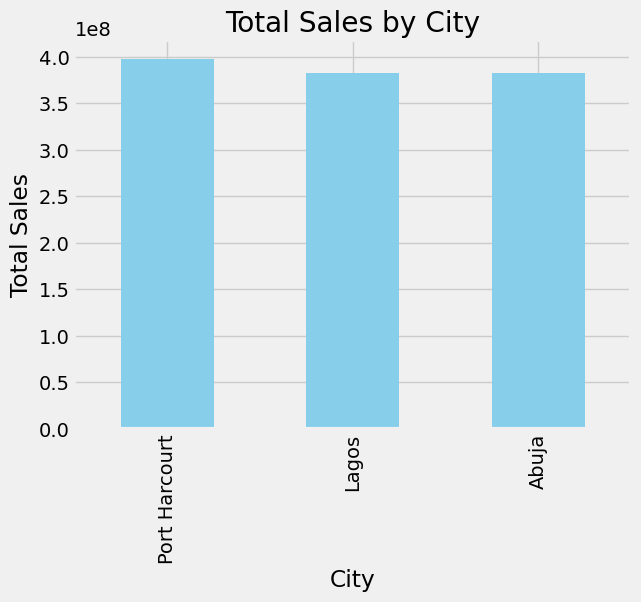

In [26]:
# Group by 'City' and calculate the total sales
total_sales_by_city = dff.groupby('City')['Total'].sum().sort_values(ascending=False)

# Plot the results
total_sales_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


In [27]:
total_sales_by_city.mean()

387560098.8

####  Table that shows the gross income of each city

In [28]:
# Display a table of gross income for each city
gross_income_by_city = grouped_city['gross income'].sum().reset_index()

# Print the table
print("Gross Income by City:")
print(gross_income_by_city)

# Determine the city with the highest total gross income
highest_gross_income_city = gross_income_by_city.loc[gross_income_by_city['gross income'].idxmax()]

print("\nCity with the Highest Total Gross Income:")
print(highest_gross_income_city)


Gross Income by City:
            City  gross income
0          Abuja    18205315.2
1          Lagos    18205777.8
2  Port Harcourt    18954635.4

City with the Highest Total Gross Income:
City            Port Harcourt
gross income       18954635.4
Name: 2, dtype: object


In [29]:
# Port Harcourt has the highest gross income.

## Data Visualization

<Axes: xlabel='count', ylabel='City'>

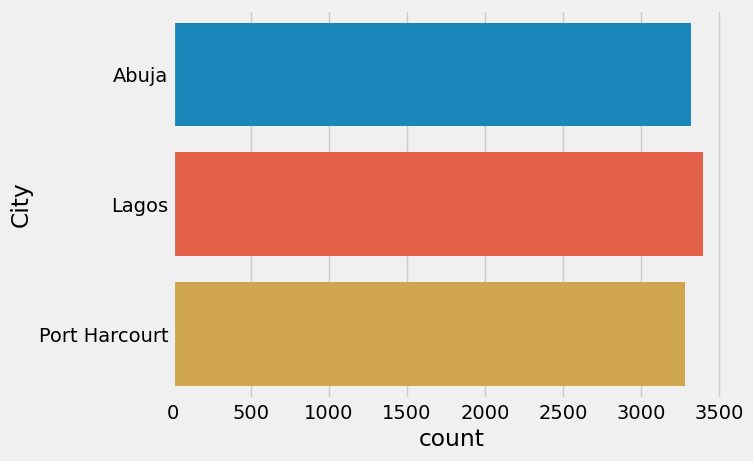

In [30]:
sns.countplot(y = 'City', data = dff)

<Axes: xlabel='count', ylabel='Payment'>

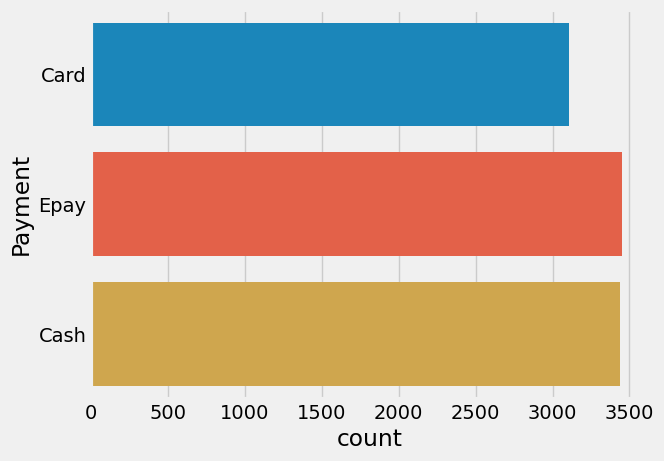

In [31]:
sns.countplot(y = 'Payment', data = dff)

<Axes: xlabel='count', ylabel='Product line'>

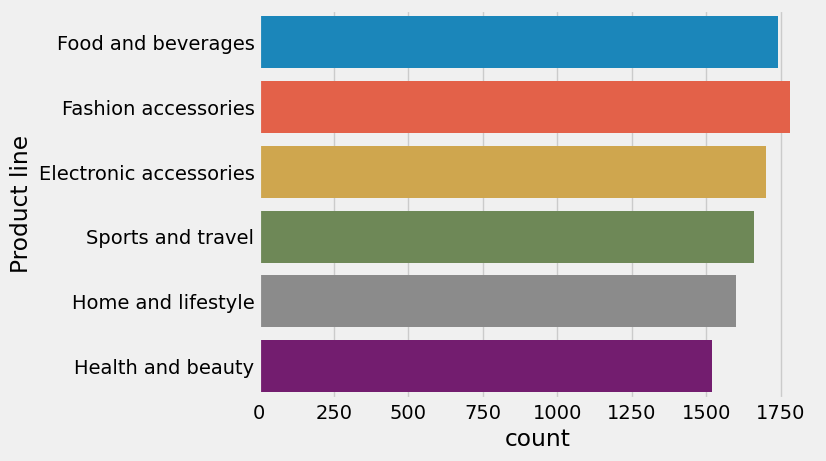

In [32]:
sns.countplot(y = 'Product line', data = dff)

<Axes: xlabel='count', ylabel='Product line'>

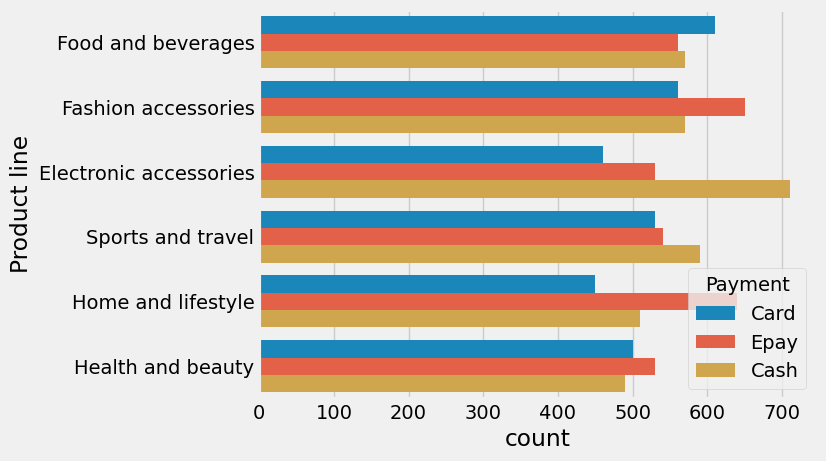

In [34]:
sns.countplot(y = 'Product line', data = dff, hue = 'Payment')

<Axes: xlabel='count', ylabel='Payment'>

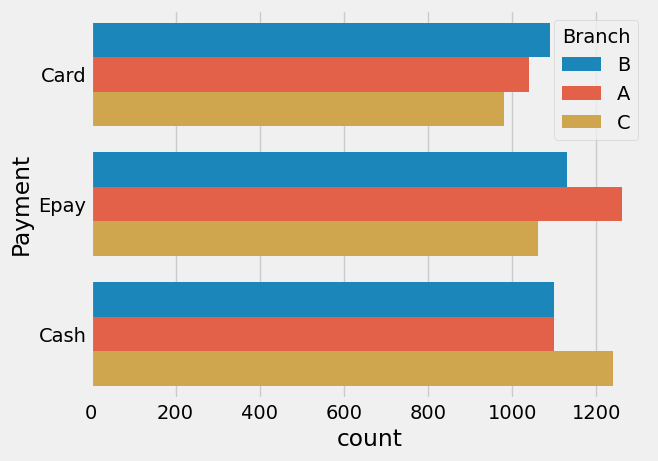

In [35]:
sns.countplot(y = 'Payment', data = dff, hue = 'Branch')

<Axes: xlabel='Branch', ylabel='Rating'>

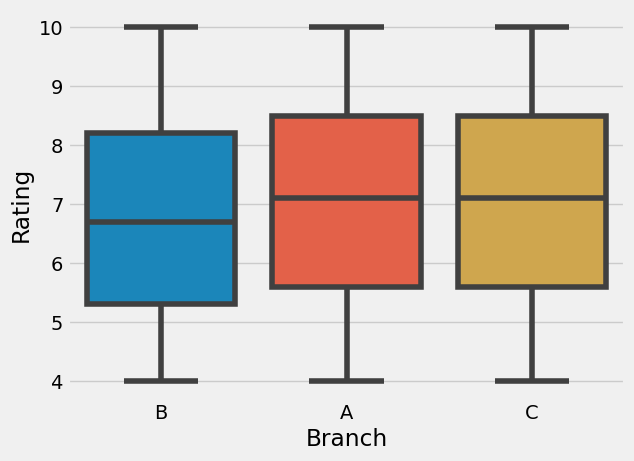

In [36]:
sns.boxplot(x = 'Branch', y = 'Rating', data = dff)

In [37]:
#Abuja

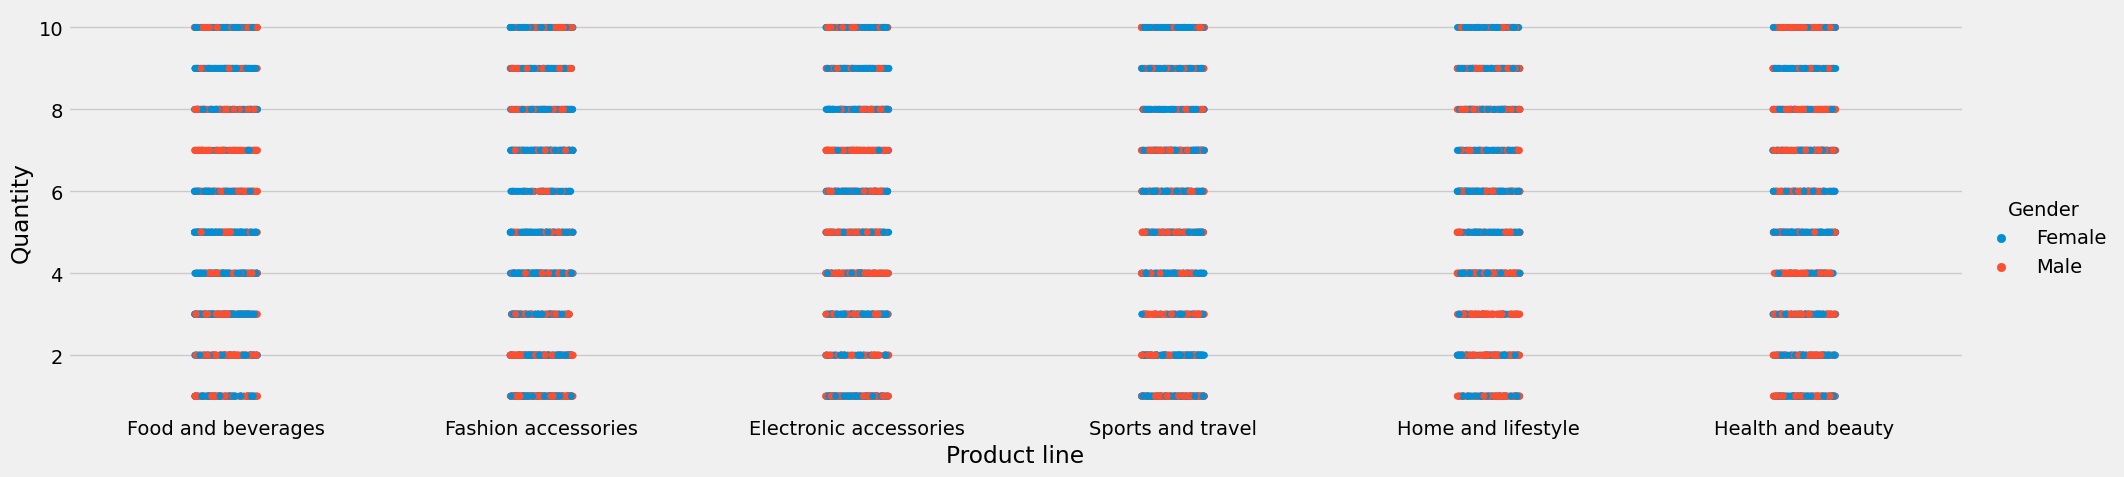

In [38]:
sns.catplot(x = 'Product line', y = 'Quantity', data = dff, hue = 'Gender', aspect = 4)

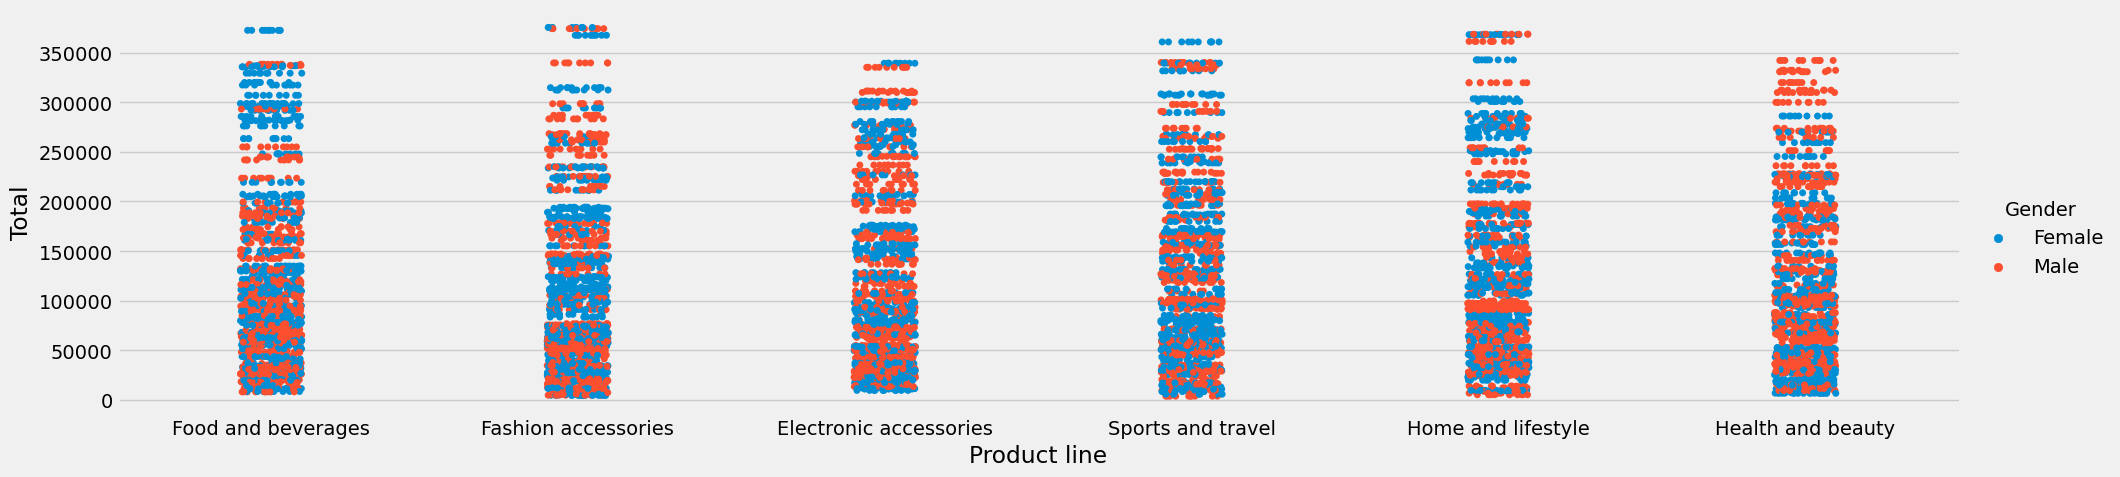

In [39]:
sns.catplot(x = 'Product line', y = 'Total', data = dff, hue = 'Gender', aspect = 4)

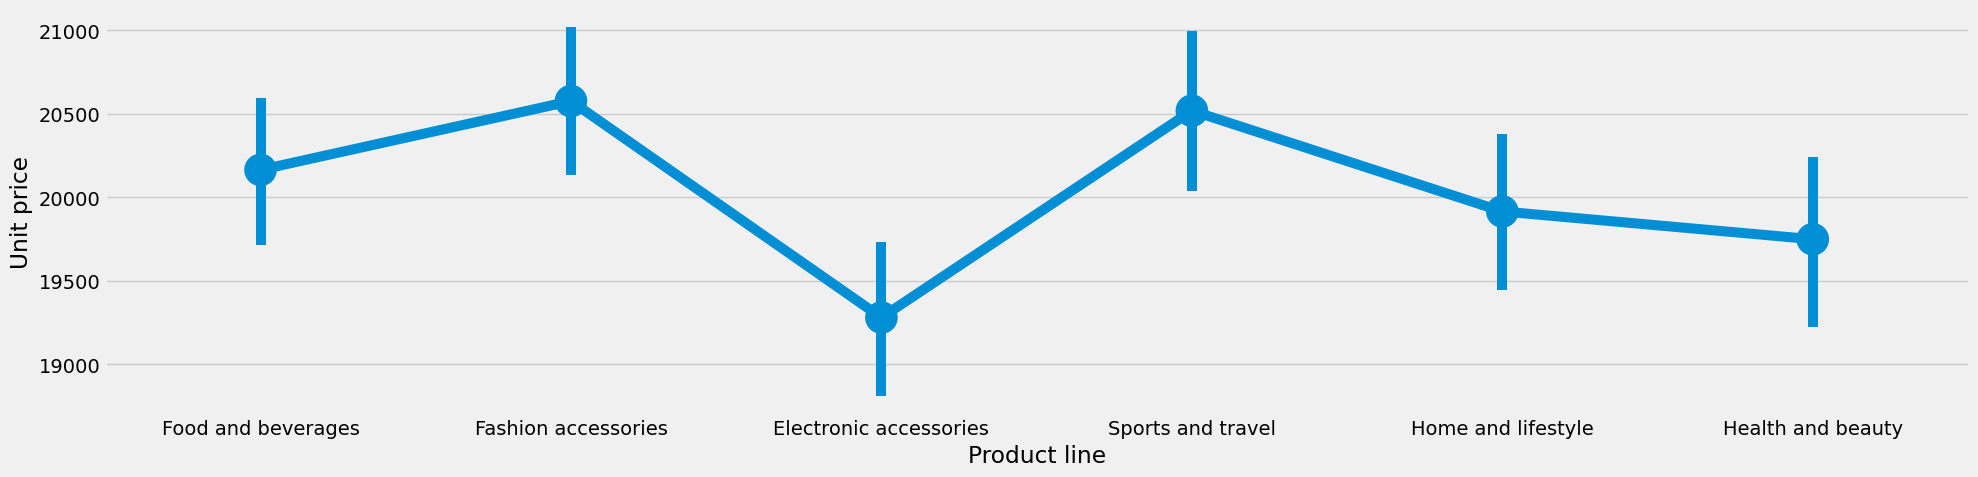

In [40]:
sns.catplot(x = 'Product line', y = 'Unit price', data = dff, kind = 'point', aspect = 4)

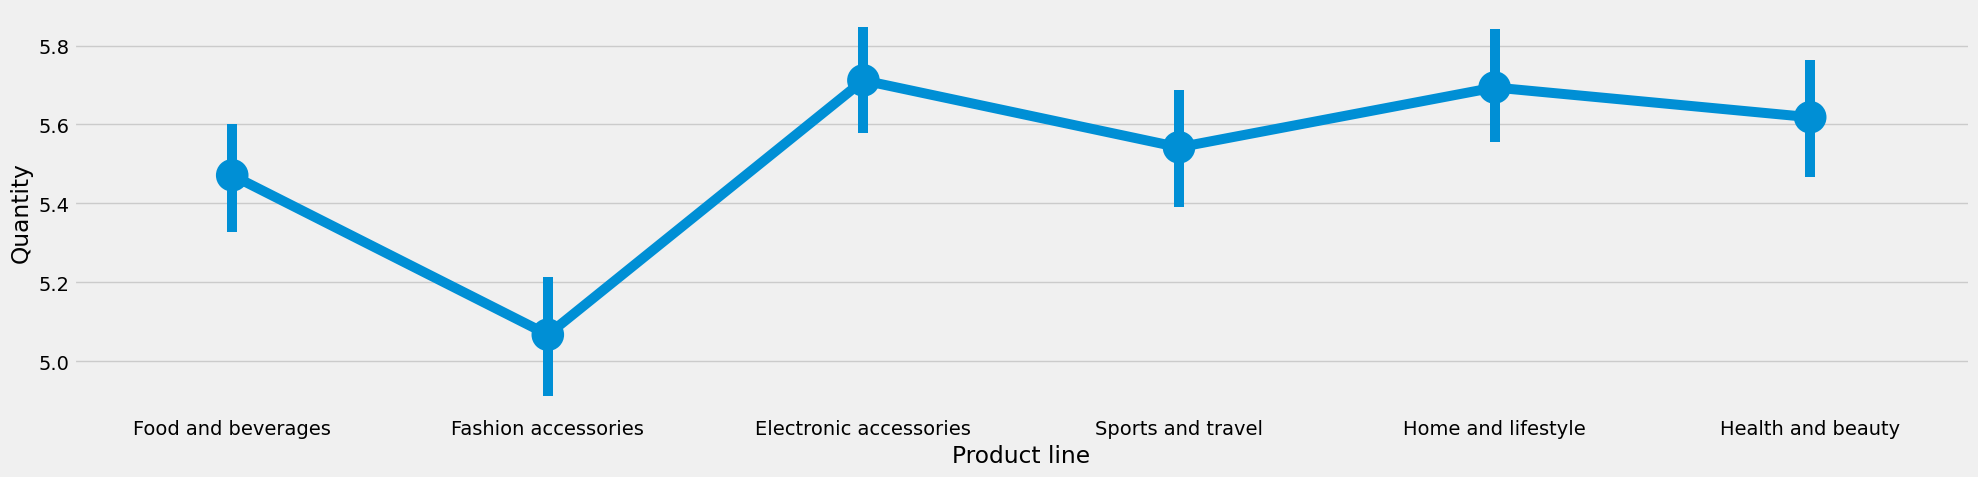

In [41]:
sns.catplot(x = 'Product line', y = 'Quantity', data = dff, kind = 'point', aspect = 4)

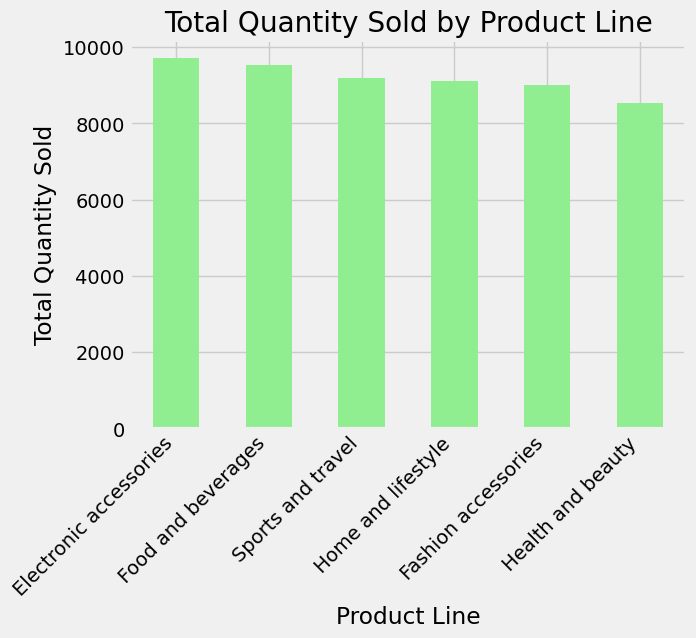

In [42]:
# Group by 'Product line' and calculate the total quantity sold
total_quantity_by_product_line = dff.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Plot the results
total_quantity_by_product_line.plot(kind='bar', color='lightgreen')
plt.title('Total Quantity Sold by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


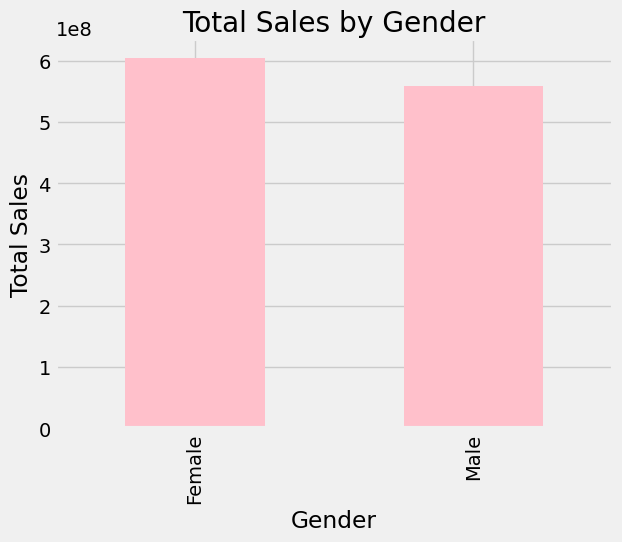

In [43]:
# Group by 'Gender' and calculate the total sales
total_sales_by_gender = dff.groupby('Gender')['Total'].sum().sort_values(ascending=False)

# Plot the results
total_sales_by_gender.plot(kind='bar', color='pink')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


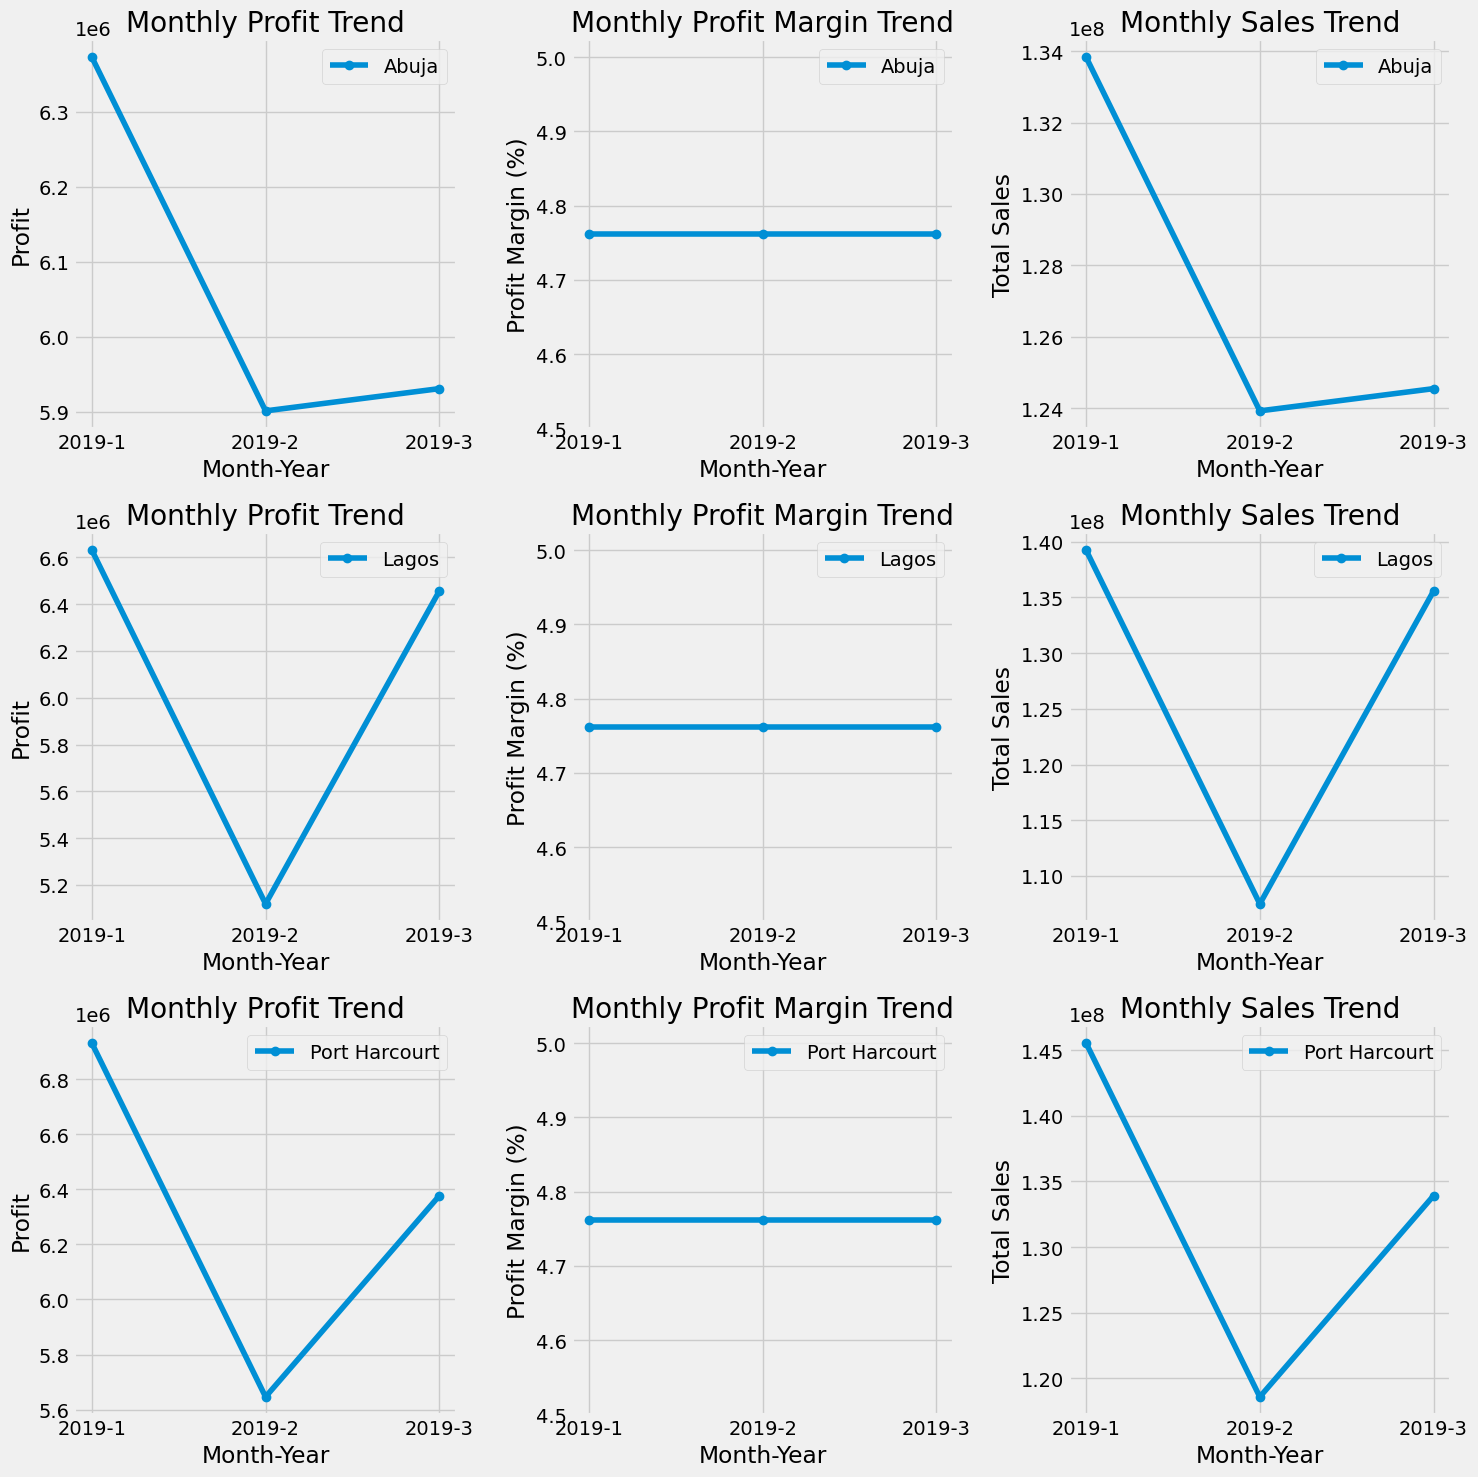

In [44]:
# Calculate profit and profit margin
dff['Profit'] = dff['Total'] - dff['cogs']
dff['Profit Margin'] = (dff['Profit'] / dff['Total']) * 100

# Group by city, month, and year
city_monthly_data = dff.groupby(['City', 'Year', 'Month']).agg({
    'Total': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean'
}).reset_index()

# Create subplots for each city
cities = city_monthly_data['City'].unique()
num_cities = len(cities)

fig, axes = plt.subplots(num_cities, 3, figsize=(15, 5*num_cities))

for i, city in enumerate(cities):
    city_data = city_monthly_data[city_monthly_data['City'] == city]
    
    # Plotting profit
    axes[i, 0].plot(city_data['Year'].astype(str) + '-' + city_data['Month'].astype(str), city_data['Profit'], marker='o', label=city)
    axes[i, 0].set_title('Monthly Profit Trend')
    axes[i, 0].set_xlabel('Month-Year')
    axes[i, 0].set_ylabel('Profit')
    axes[i, 0].legend()

    # Plotting profit margin
    axes[i, 1].plot(city_data['Year'].astype(str) + '-' + city_data['Month'].astype(str), city_data['Profit Margin'], marker='o', label=city)
    axes[i, 1].set_title('Monthly Profit Margin Trend')
    axes[i, 1].set_xlabel('Month-Year')
    axes[i, 1].set_ylabel('Profit Margin (%)')
    axes[i, 1].legend()

    # Plotting monthly sales trend
    axes[i, 2].plot(city_data['Year'].astype(str) + '-' + city_data['Month'].astype(str), city_data['Total'], marker='o', label=city)
    axes[i, 2].set_title('Monthly Sales Trend')
    axes[i, 2].set_xlabel('Month-Year')
    axes[i, 2].set_ylabel('Total Sales')
    axes[i, 2].legend()

plt.tight_layout()
plt.show()

In [45]:
# Group by hour and calculate total sales
hourly_sales = dff.groupby('Hour')['Total'].sum()

# Find the hour with the highest sales
hour_with_highest_sales = hourly_sales.idxmax()

print(f"The hour with the highest sales is: {hour_with_highest_sales}")


The hour with the highest sales is: 19


In [46]:
# Group by day of the month and calculate total sales
daily_sales = dff.groupby('Day')['Total'].sum()

# Find the day of the month with the highest sales
day_with_highest_sales = daily_sales.idxmax()

print(f"The day of the month with the highest sales is: {day_with_highest_sales}")


The day of the month with the highest sales is: 15


In [47]:
# Group by hour and product line, calculate total sales
hourly_product_sales = dff.groupby(['Hour', 'Product line'])['Total'].sum().reset_index()

# Find the hour with the highest sales
hour_with_highest_sales = hourly_product_sales.groupby('Hour')['Total'].sum().idxmax()

# Filter the data for that specific hour
highest_sales_hour_data = hourly_product_sales[hourly_product_sales['Hour'] == hour_with_highest_sales]

# Find the product line with the highest sales during that hour
product_line_with_highest_sales = highest_sales_hour_data.loc[
    highest_sales_hour_data['Total'].idxmax(), 'Product line'
]

print(f"The hour of the day with the highest sales is: {hour_with_highest_sales}")
print(f"The product line with the highest sales at that time is: {product_line_with_highest_sales}")


The hour of the day with the highest sales is: 19
The product line with the highest sales at that time is: Sports and travel


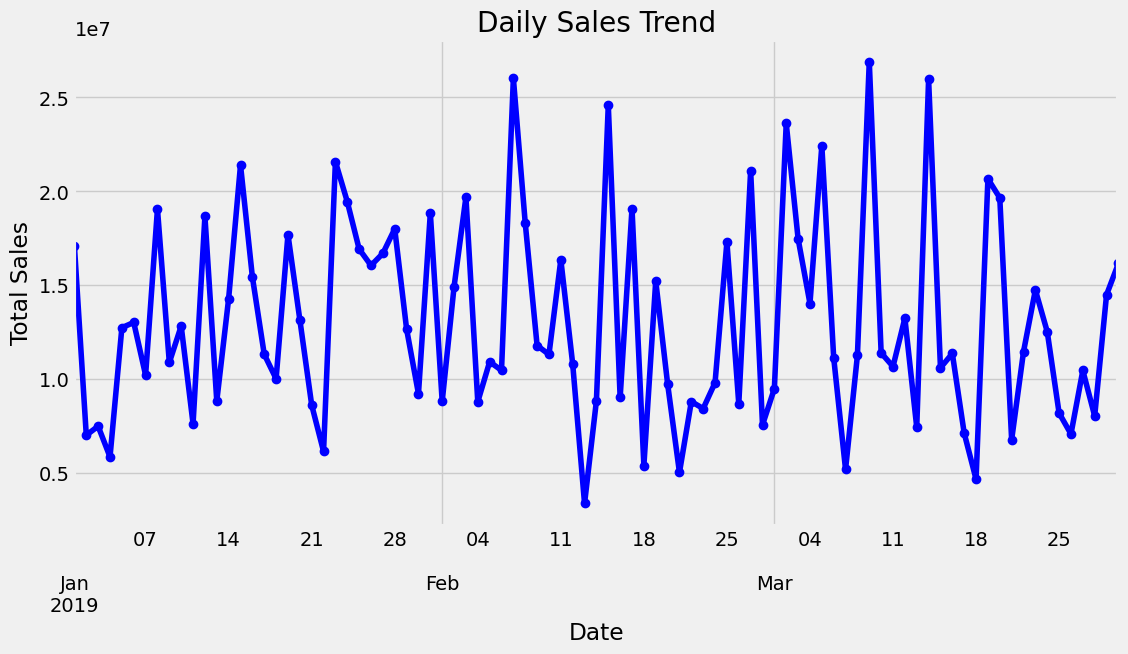

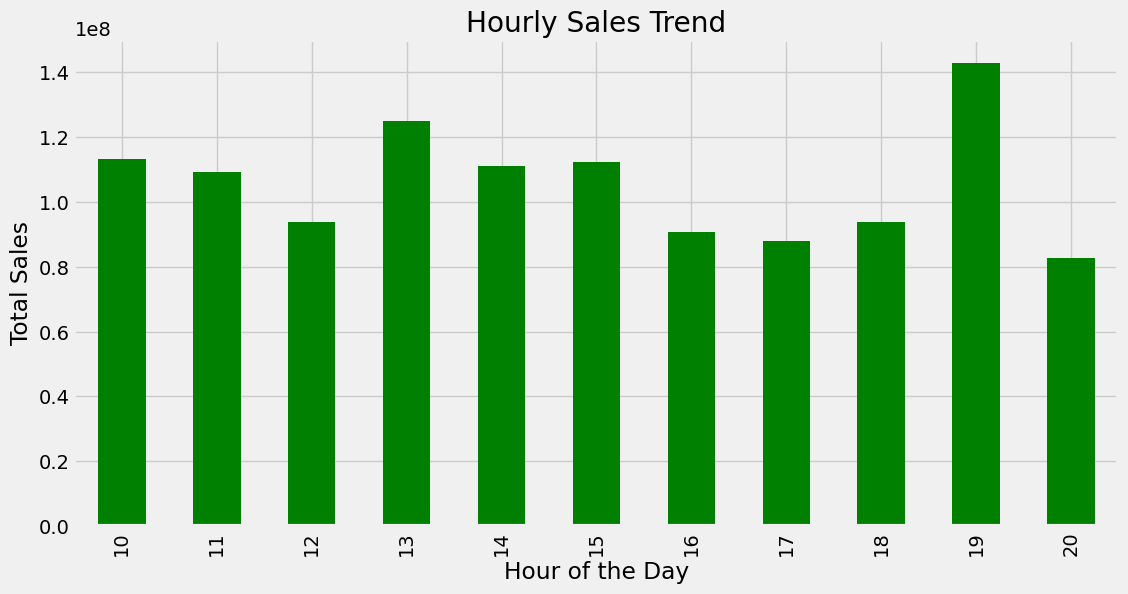

In [48]:
# Daily Sales Trend
daily_sales_trend = dff.groupby('Date')['Total'].sum()

plt.figure(figsize=(12, 6))
daily_sales_trend.plot(kind='line', marker='o', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Hourly Sales Trend
hourly_sales_trend = dff.groupby('Hour')['Total'].sum()

plt.figure(figsize=(12, 6))
hourly_sales_trend.plot(kind='bar', color='green')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

In [50]:
# Group by 'invoice ID' and calculate total purchase for each customer
customer_purchase = dff.groupby('Invoice ID')['Total'].sum()

# Find the customer with the highest purchase
customer_with_highest_purchase = customer_purchase.idxmax()

# Get the total purchase amount for the customer with the highest purchase
highest_purchase_amount = customer_purchase.max()

print(f"The customer with the highest purchase is: {customer_with_highest_purchase}")
print(f"The total purchase amount for this customer is: {highest_purchase_amount}")


The customer with the highest purchase is: 860-79-0874
The total purchase amount for this customer is: 3753540.0000000005
